# Load Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Load Data

In [3]:
mean_type='one_hot'
noise_type='pareto'
algos_types=['ape-GEV','ape-gamma','ape-pareto','ape-frechet','ucb-truncated-mean','dsee','gsr']

gap = 0.1
p=1.5
scale = 1.0
# gap = 0.3
# p=1.1
# scale = 0.1
K = 10
samples=20000
n_seeds=20

algos_name = [[] for _ in range(len(algos_types))]
total_regret_list = [[] for _ in range(len(algos_types))]
agv_regret_list = [[] for _ in range(len(algos_types))]
action_cnt = [[] for _ in range(len(algos_types))]

for algo_idx, algos_type in enumerate(algos_types):
    for seed in range(1,n_seeds):
        filename = 'multi_armed_bandit_results/exp-{:}-{:}-{:}-p{:.2f}-s{:.2f}-g{:.2f}-K{:d}-size{:d}-seed{:d}.npy'.format(mean_type,noise_type,algos_type,p,scale,gap,K,samples,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f)
            algos_name[algo_idx]=data_per_seed['algos_name']
            total_regret_list[algo_idx].append(data_per_seed['total_regret_list'])
            agv_regret_list[algo_idx].append(data_per_seed['agv_regret_list'])
            action_cnt[algo_idx].append(data_per_seed['action_cnt'])

# Plot Results

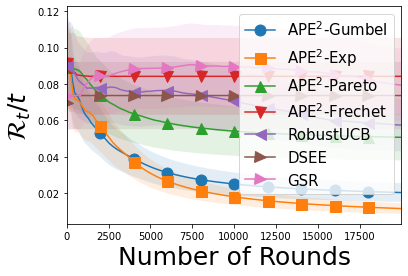

In [5]:
x_list = np.arange(len(agv_regret_list[0][0][0]))

for algo_type_idx, algos_type in enumerate(algos_types):
    mean_list = np.mean(agv_regret_list[algo_type_idx],axis=0)
    std_list = np.mean(agv_regret_list[algo_type_idx],axis=0)
    a = 0.25
#     for algo_idx, algo_name in enumerate(algos_name[algo_type_idx]):
#         plt.fill_between(x_list[1:],mean_list[algo_idx][1:]-a*std_list[algo_idx][1:],mean_list[algo_idx][1:]+a*std_list[algo_idx][1:],alpha=0.13)
#         plt.plot(x_list[1:],mean_list[algo_idx][1:],label=algo_name, marker='.', ms=11, markevery=1000)
    best_opt_idx = np.argmin(mean_list[:,-1])
    if 'APE-Gumbel' in algos_name[algo_type_idx]:
        algo_label = 'APE$^{2}$-Gumbel'
        m='o'
    elif 'APE-Exp' in algos_name[algo_type_idx]:
        algo_label = 'APE$^{2}$-Exp'
        m='s'
    elif 'APE-Gamma-Opt' in algos_name[algo_type_idx]:
        algo_label = 'APE$^{2}$-Exp'
        m='s'
    elif 'APE-Pareto' in algos_name[algo_type_idx]:
        algo_label = 'APE$^{2}$-Pareto'
        m='^'
    elif 'APE-Frechet' in algos_name[algo_type_idx]:
        algo_label = 'APE$^{2}$-Frechet'
        m='v'
    elif 'RobustUCB-Truncated-Mean (Naive)' in algos_name[algo_type_idx]:
        algo_label = 'RobustUCB'
        m='<'
    elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
        algo_label = 'RobustUCB'
        m='<'
    elif 'DSEE' in algos_name[algo_type_idx]:
        algo_label = 'DSEE'
        m='>'
    elif 'GSR' in algos_name[algo_type_idx]:
        algo_label = 'GSR'
        m='>'
#     print(algos_name[algo_type_idx])
    init_idx = 2*K
    plt.fill_between(x_list[init_idx:],mean_list[best_opt_idx][init_idx:]-a*std_list[best_opt_idx][init_idx:],mean_list[best_opt_idx][init_idx:]+a*std_list[best_opt_idx][init_idx:],alpha=0.13)
    plt.plot(x_list[init_idx:],mean_list[best_opt_idx][init_idx:],label=algo_label, marker=m, ms=11, markevery=2000)

# plt.xscale("log")
plt.xlim([np.min(x_list),np.max(x_list)])
# plt.ylim([0.0,0.15]) # 1.5 1.0
# plt.ylim([0.0,0.006]) # 1.9 1.0
# plt.ylim([0.0,0.1]) # 1.2 0.5
# plt.ylim([0.025,0.16]) #1.2 0.1
# plt.ylim([0.3,1.4]) #1.2 1.0
# plt.ylim([0.1,0.4]) #1.1 0.1
# plt.ylim([0.3,1.4]) #1.1 0.5
# plt.ylim([1.0,4.0]) #1.1 1.0
plt.xlabel("Number of Rounds",fontsize=25)
plt.ylabel("$\mathcal{R}_{t}/t$",fontsize=25)

# plt.xticks(x_list[::25],x_list[::25],fontsize=18)
# plt.yticks(fontsize=18)
# y_ticks,_=plt.yticks()
# plt.yticks(y_ticks[::2], ["{:.2f}".format(tick) for tick in y_ticks[::2]],fontsize=18)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.legend(prop={'size' : 15})
# print(plt.yticks())
plt.show()